## Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import gdown
import glob

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import IPython
from IPython.display import Image, display

In [2]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 32.5/235.7 GB disk)


## Check compute

In [3]:
!nvidia-smi

Mon Nov 25 18:57:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   38C    P8              12W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


## Model Training

### Config and run YOLO 11

In [3]:
# Change directory
os.chdir('/content/drive/MyDrive/projects/Face-Mask-Detection/data')

In [6]:
# Config YOLO 11
!yolo task=detect mode=train \
      model=yolo11n.yaml \
      data=data_config.yaml \
      epochs=50 \
      batch=128 \
      imgsz=640 \
      plots=True

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=data_config.yaml, epochs=50, time=None, patience=100, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

### Continue Training of YOLO 11

In [37]:
# Change directory
os.chdir('/content/drive/MyDrive/projects/Face-Mask-Detection/data')

# Define location of pre-trained model
base_dir = 'runs/detect'
trained_dir = "train_yolo11n_v4/weights/best.pt"
trained_model_path = os.path.join(base_dir, trained_dir)
trained_model_path

'runs/detect/train_yolo11n_v4/weights/best.pt'

In [38]:
# Config YOLO 11
!yolo task=detect mode=train \
      model={trained_model_path}\
      data=data_config.yaml \
      epochs=50 \
      batch=32 \
      imgsz=640 \
      lr0=0.0005 \
      patience=10 \
      plots=True \
      name=train_yolo11n_v5

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train_yolo11n_v4/weights/best.pt, data=data_config.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_yolo11n_v5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

### Training Results

In [39]:
base_dir = 'runs/detect'
run_name = "train_yolo11n_v5"

run_path = os.path.join(base_dir, run_name)

#### Output Files

In [40]:
!ls {run_path}

args.yaml					     R_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	 val_batch0_pred.jpg
confusion_matrix.png				     results.png	 val_batch1_labels.jpg
events.out.tfevents.1732598525.f19c917b24b6.15040.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					     train_batch760.jpg  weights
P_curve.png					     train_batch761.jpg
PR_curve.png					     train_batch762.jpg


#### Confusion Matrix

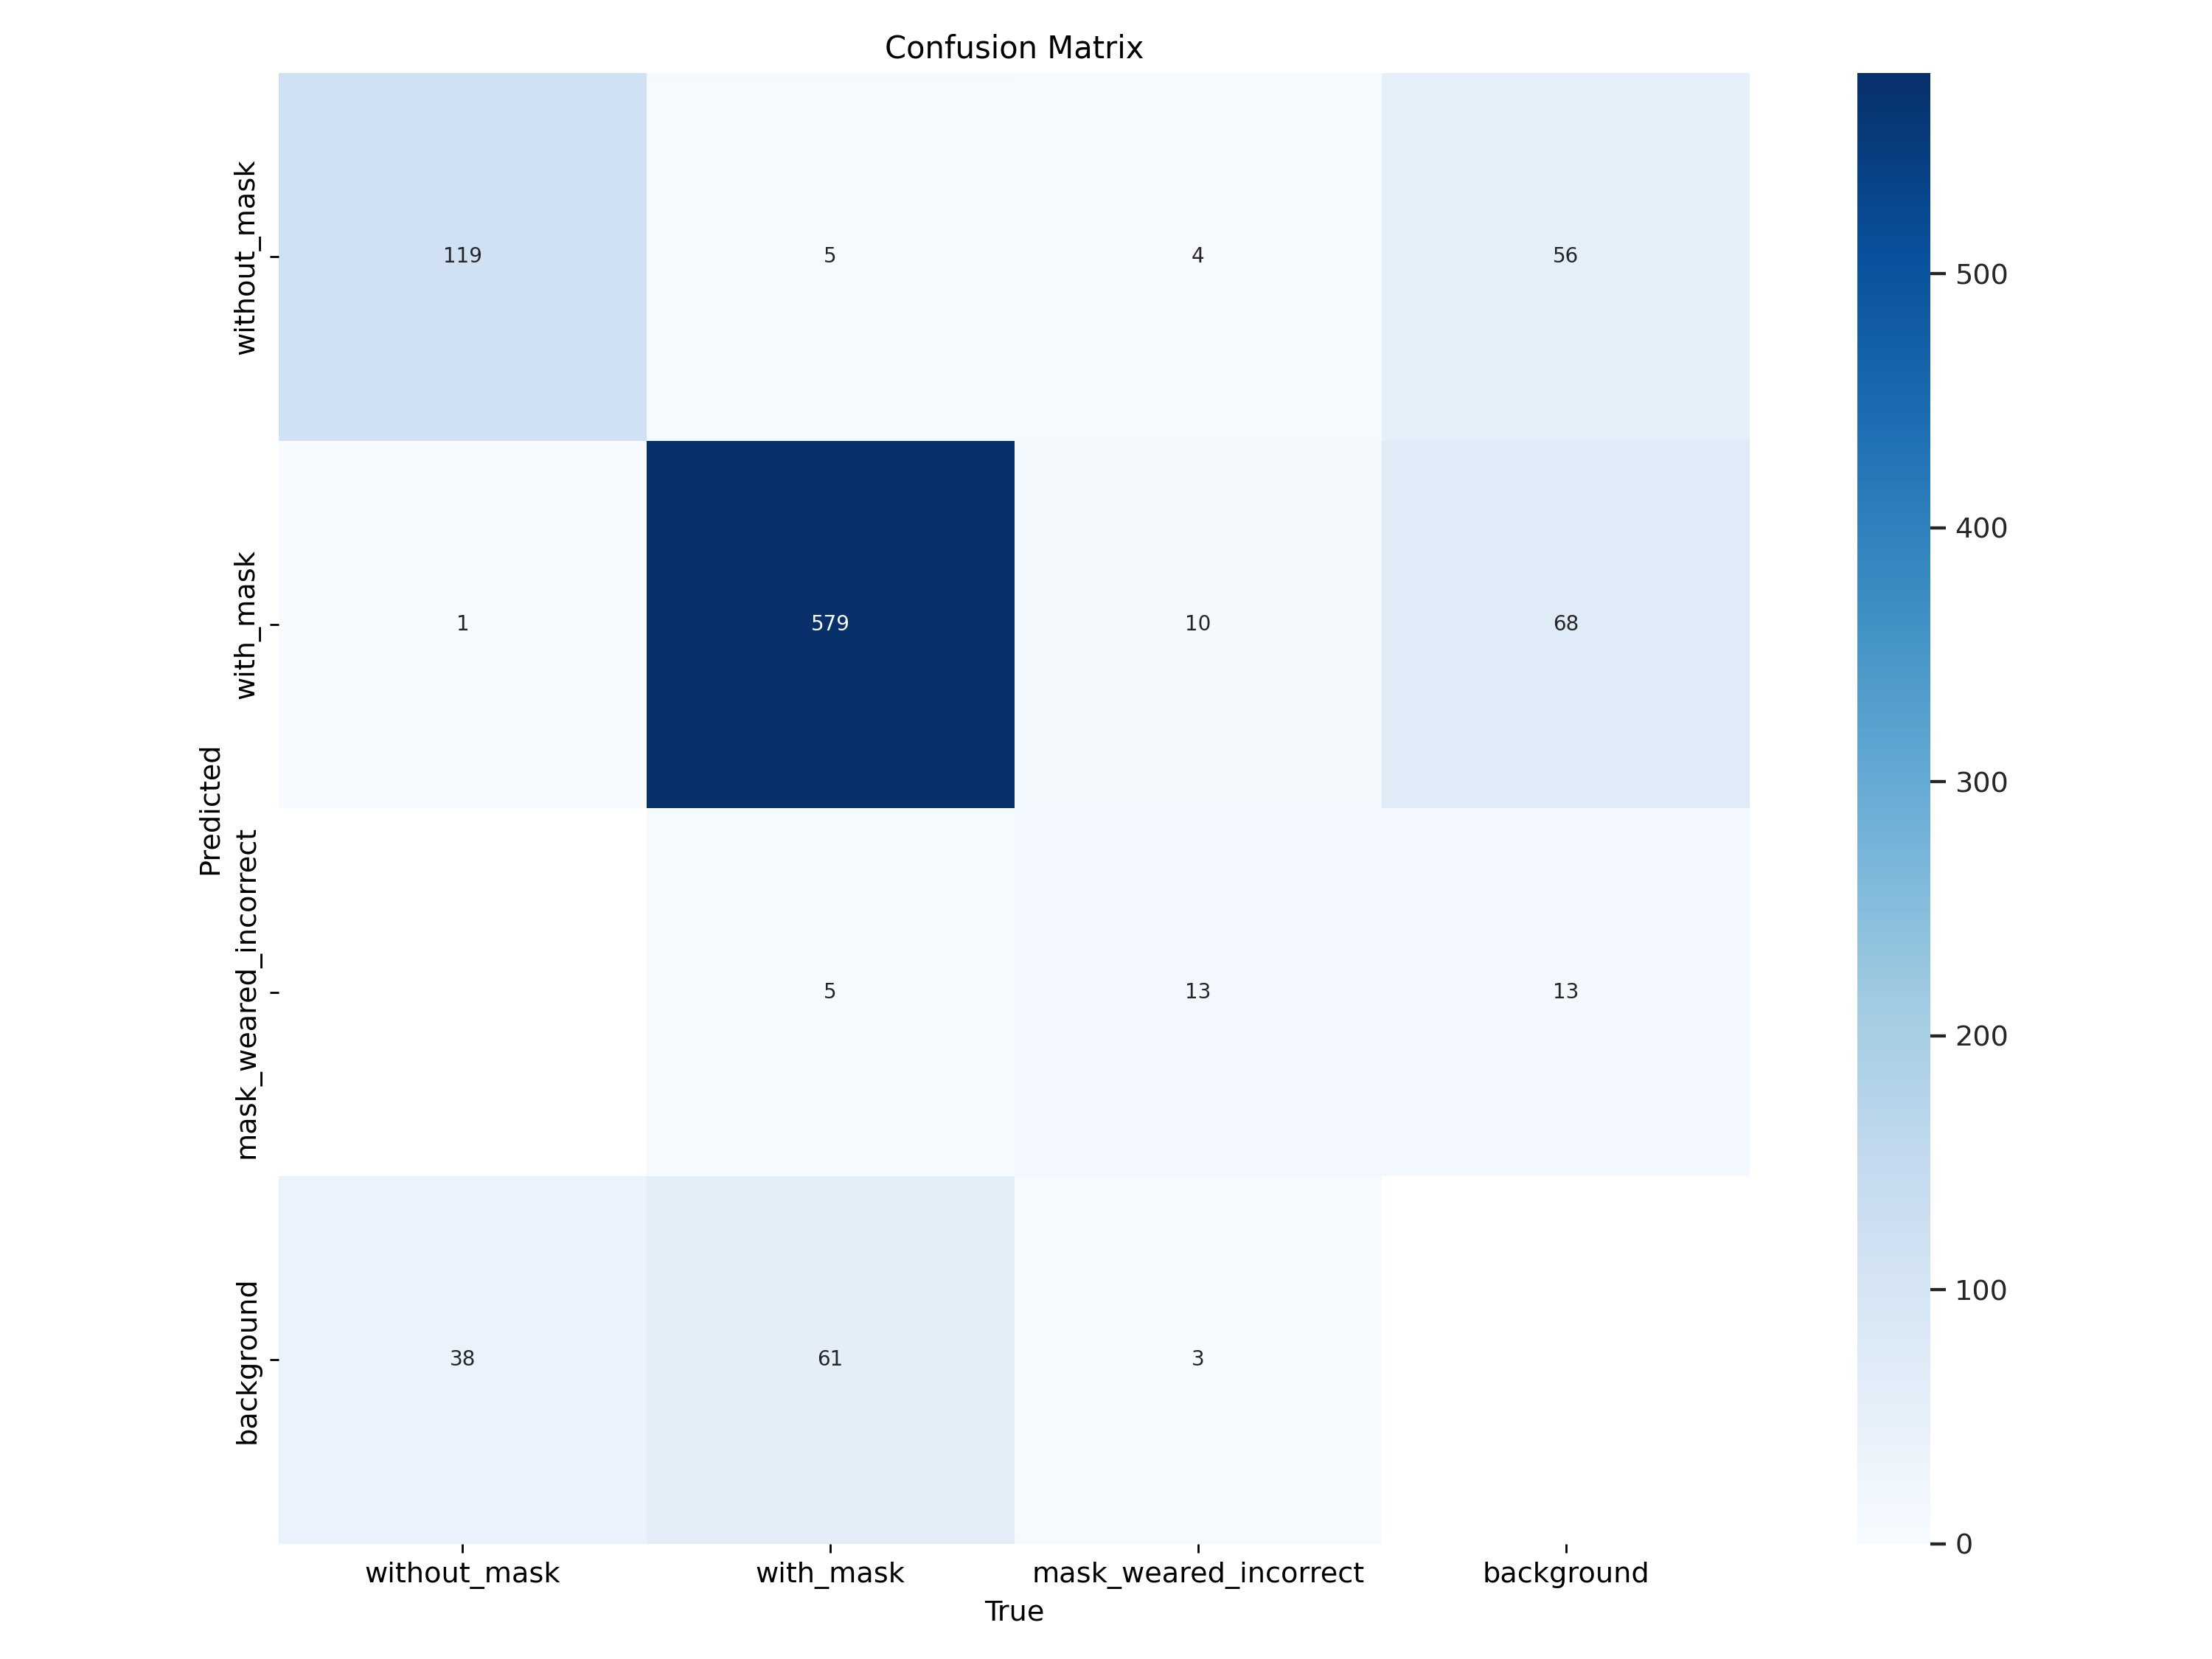

In [41]:
Image(filename=f'{run_path}/confusion_matrix.png', width=600)

#### Confusion Matix Normalized

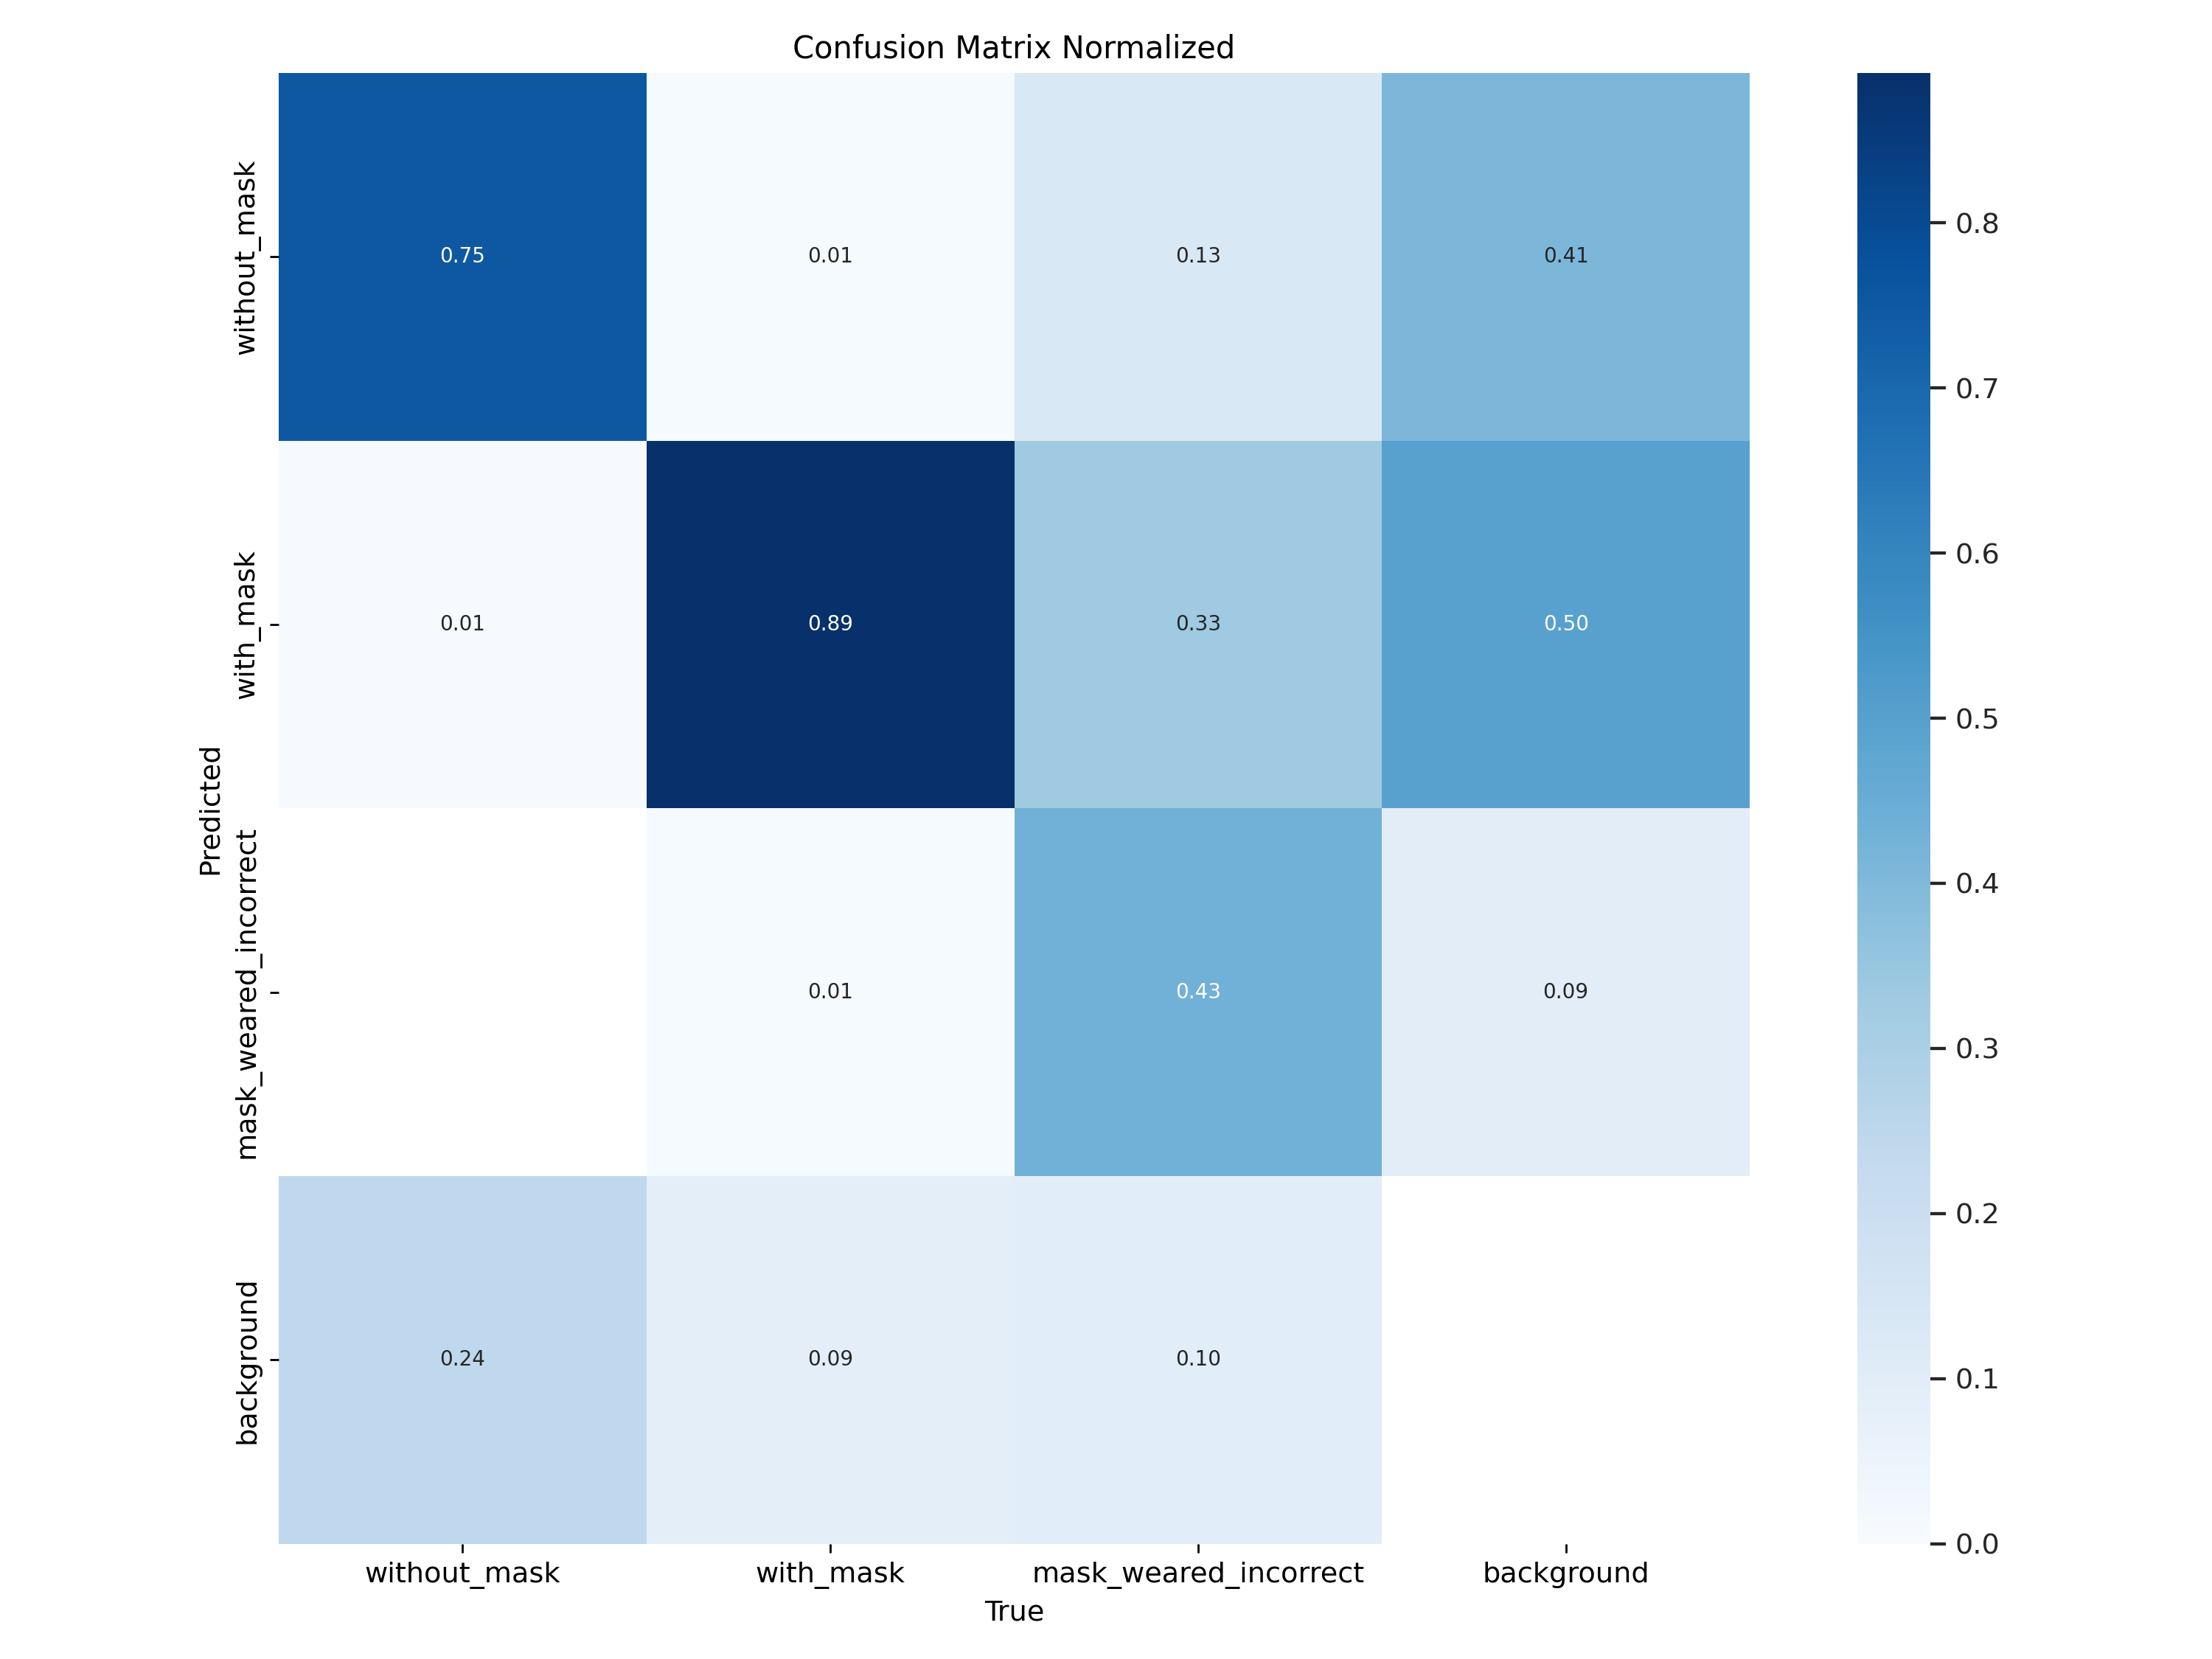

In [42]:
Image(filename=f'{run_path}/confusion_matrix_normalized.png', width=600)

#### P-Curve

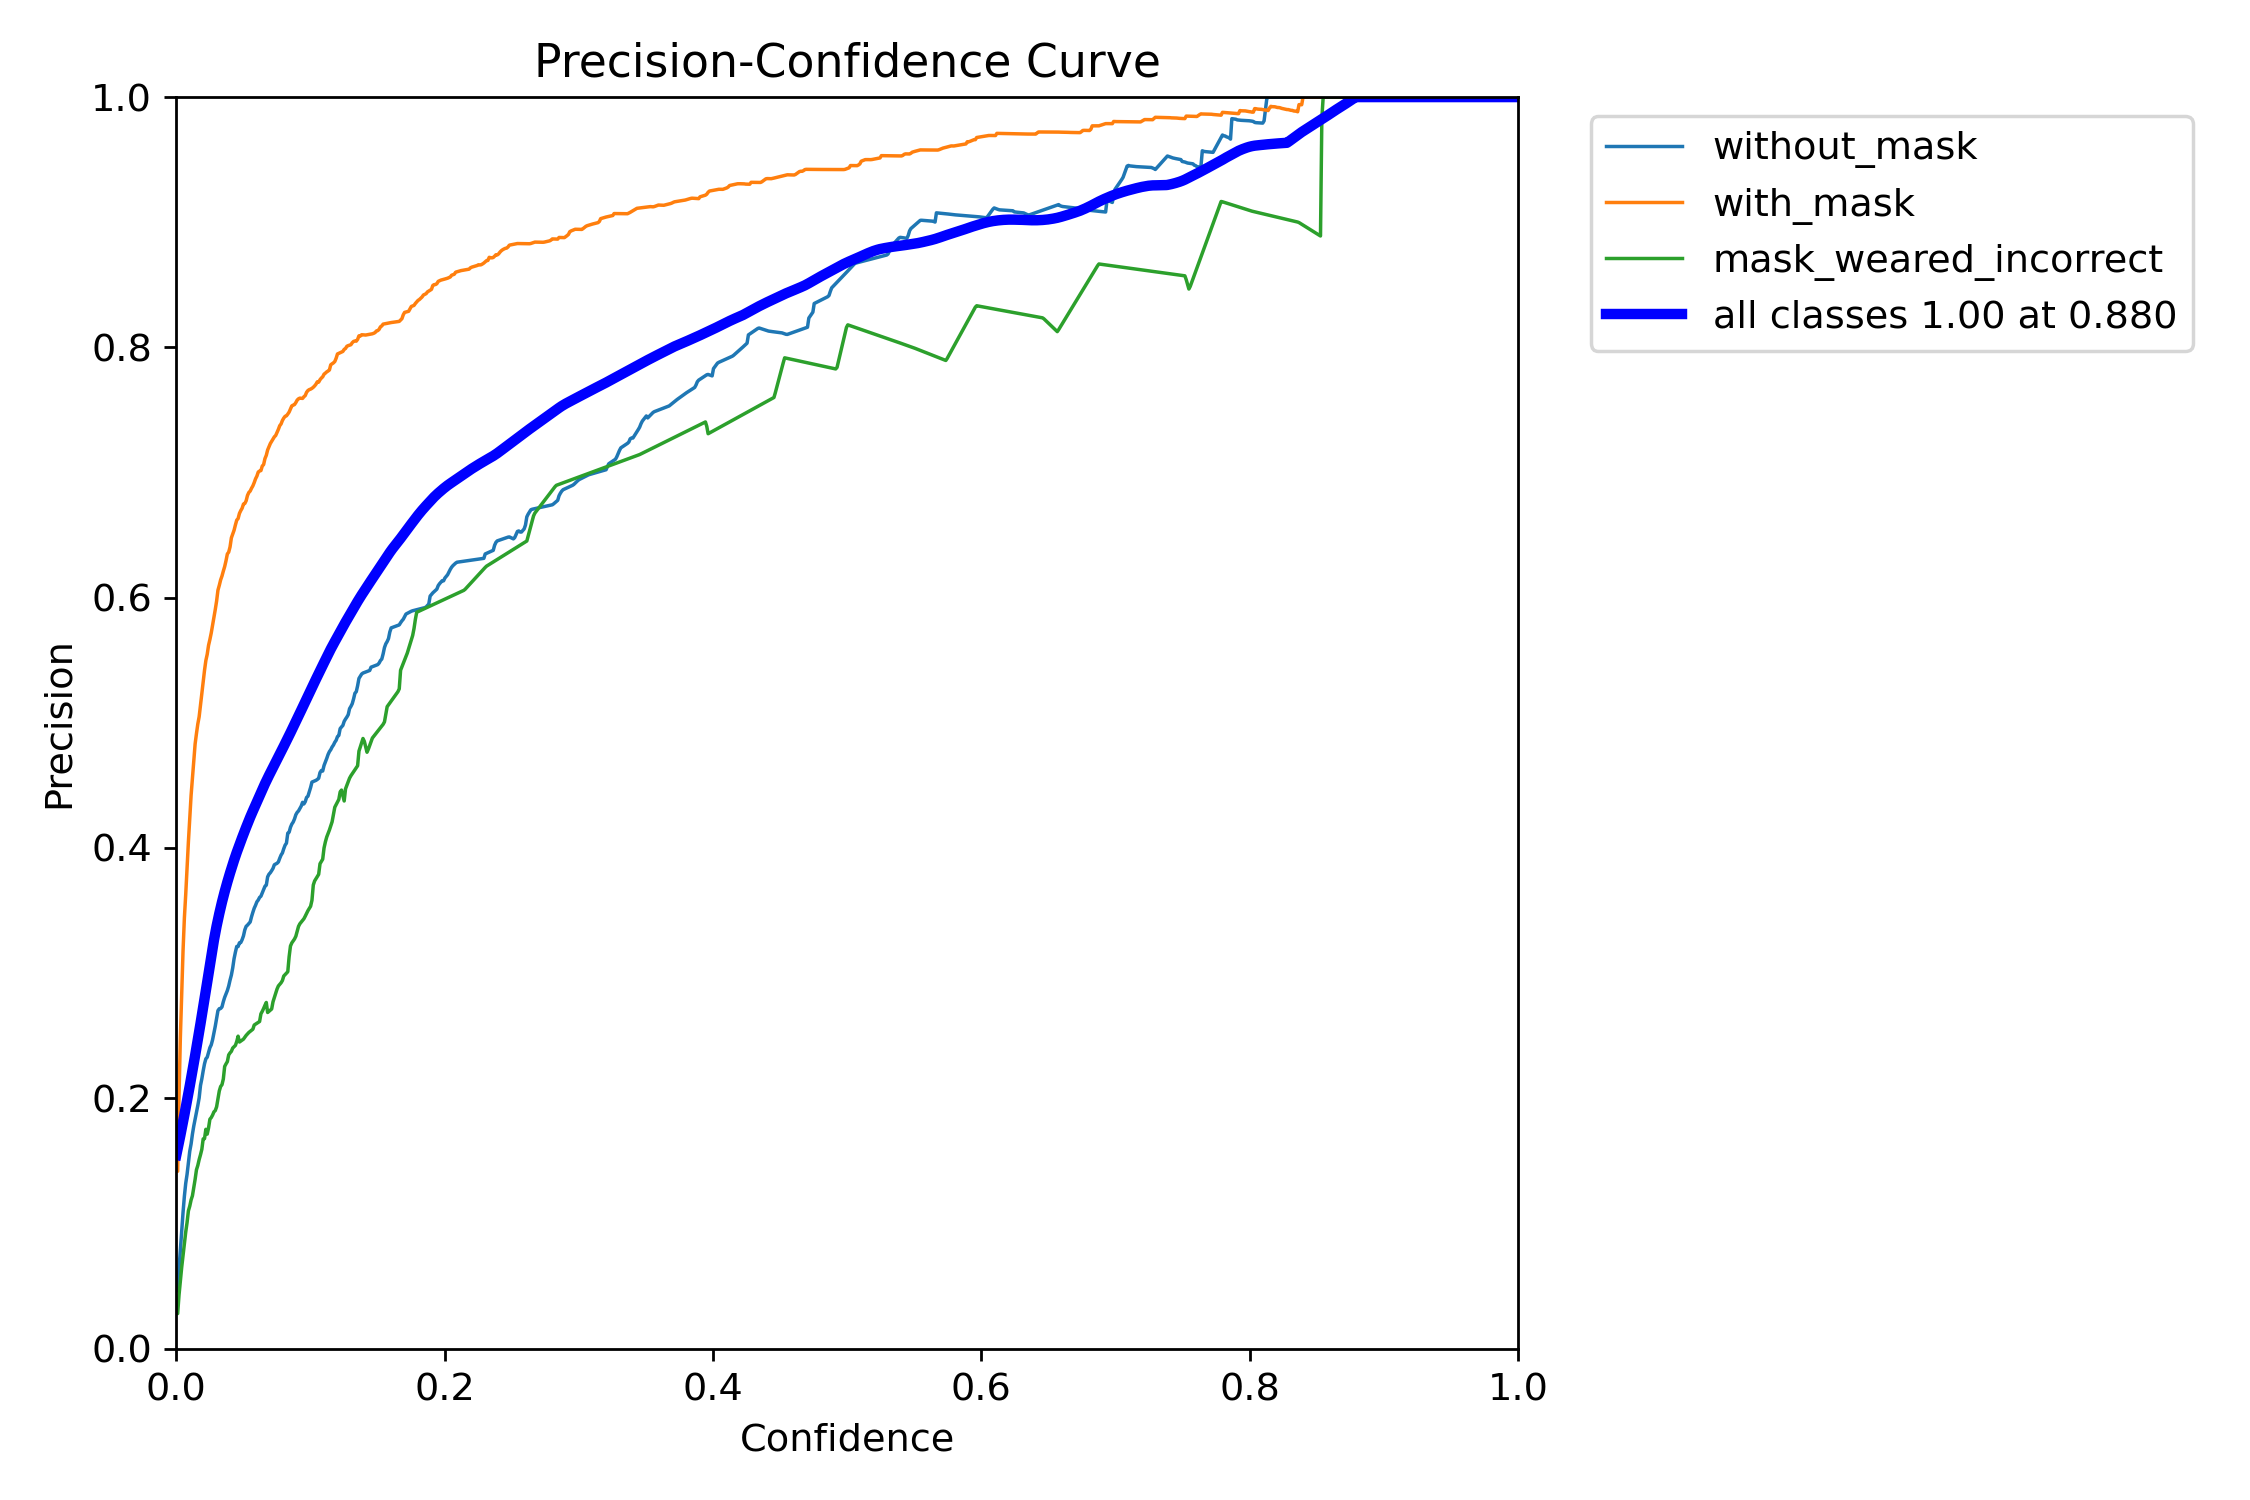

In [43]:
Image(filename=f'{run_path}/P_curve.png', width=600)

#### R-Curve

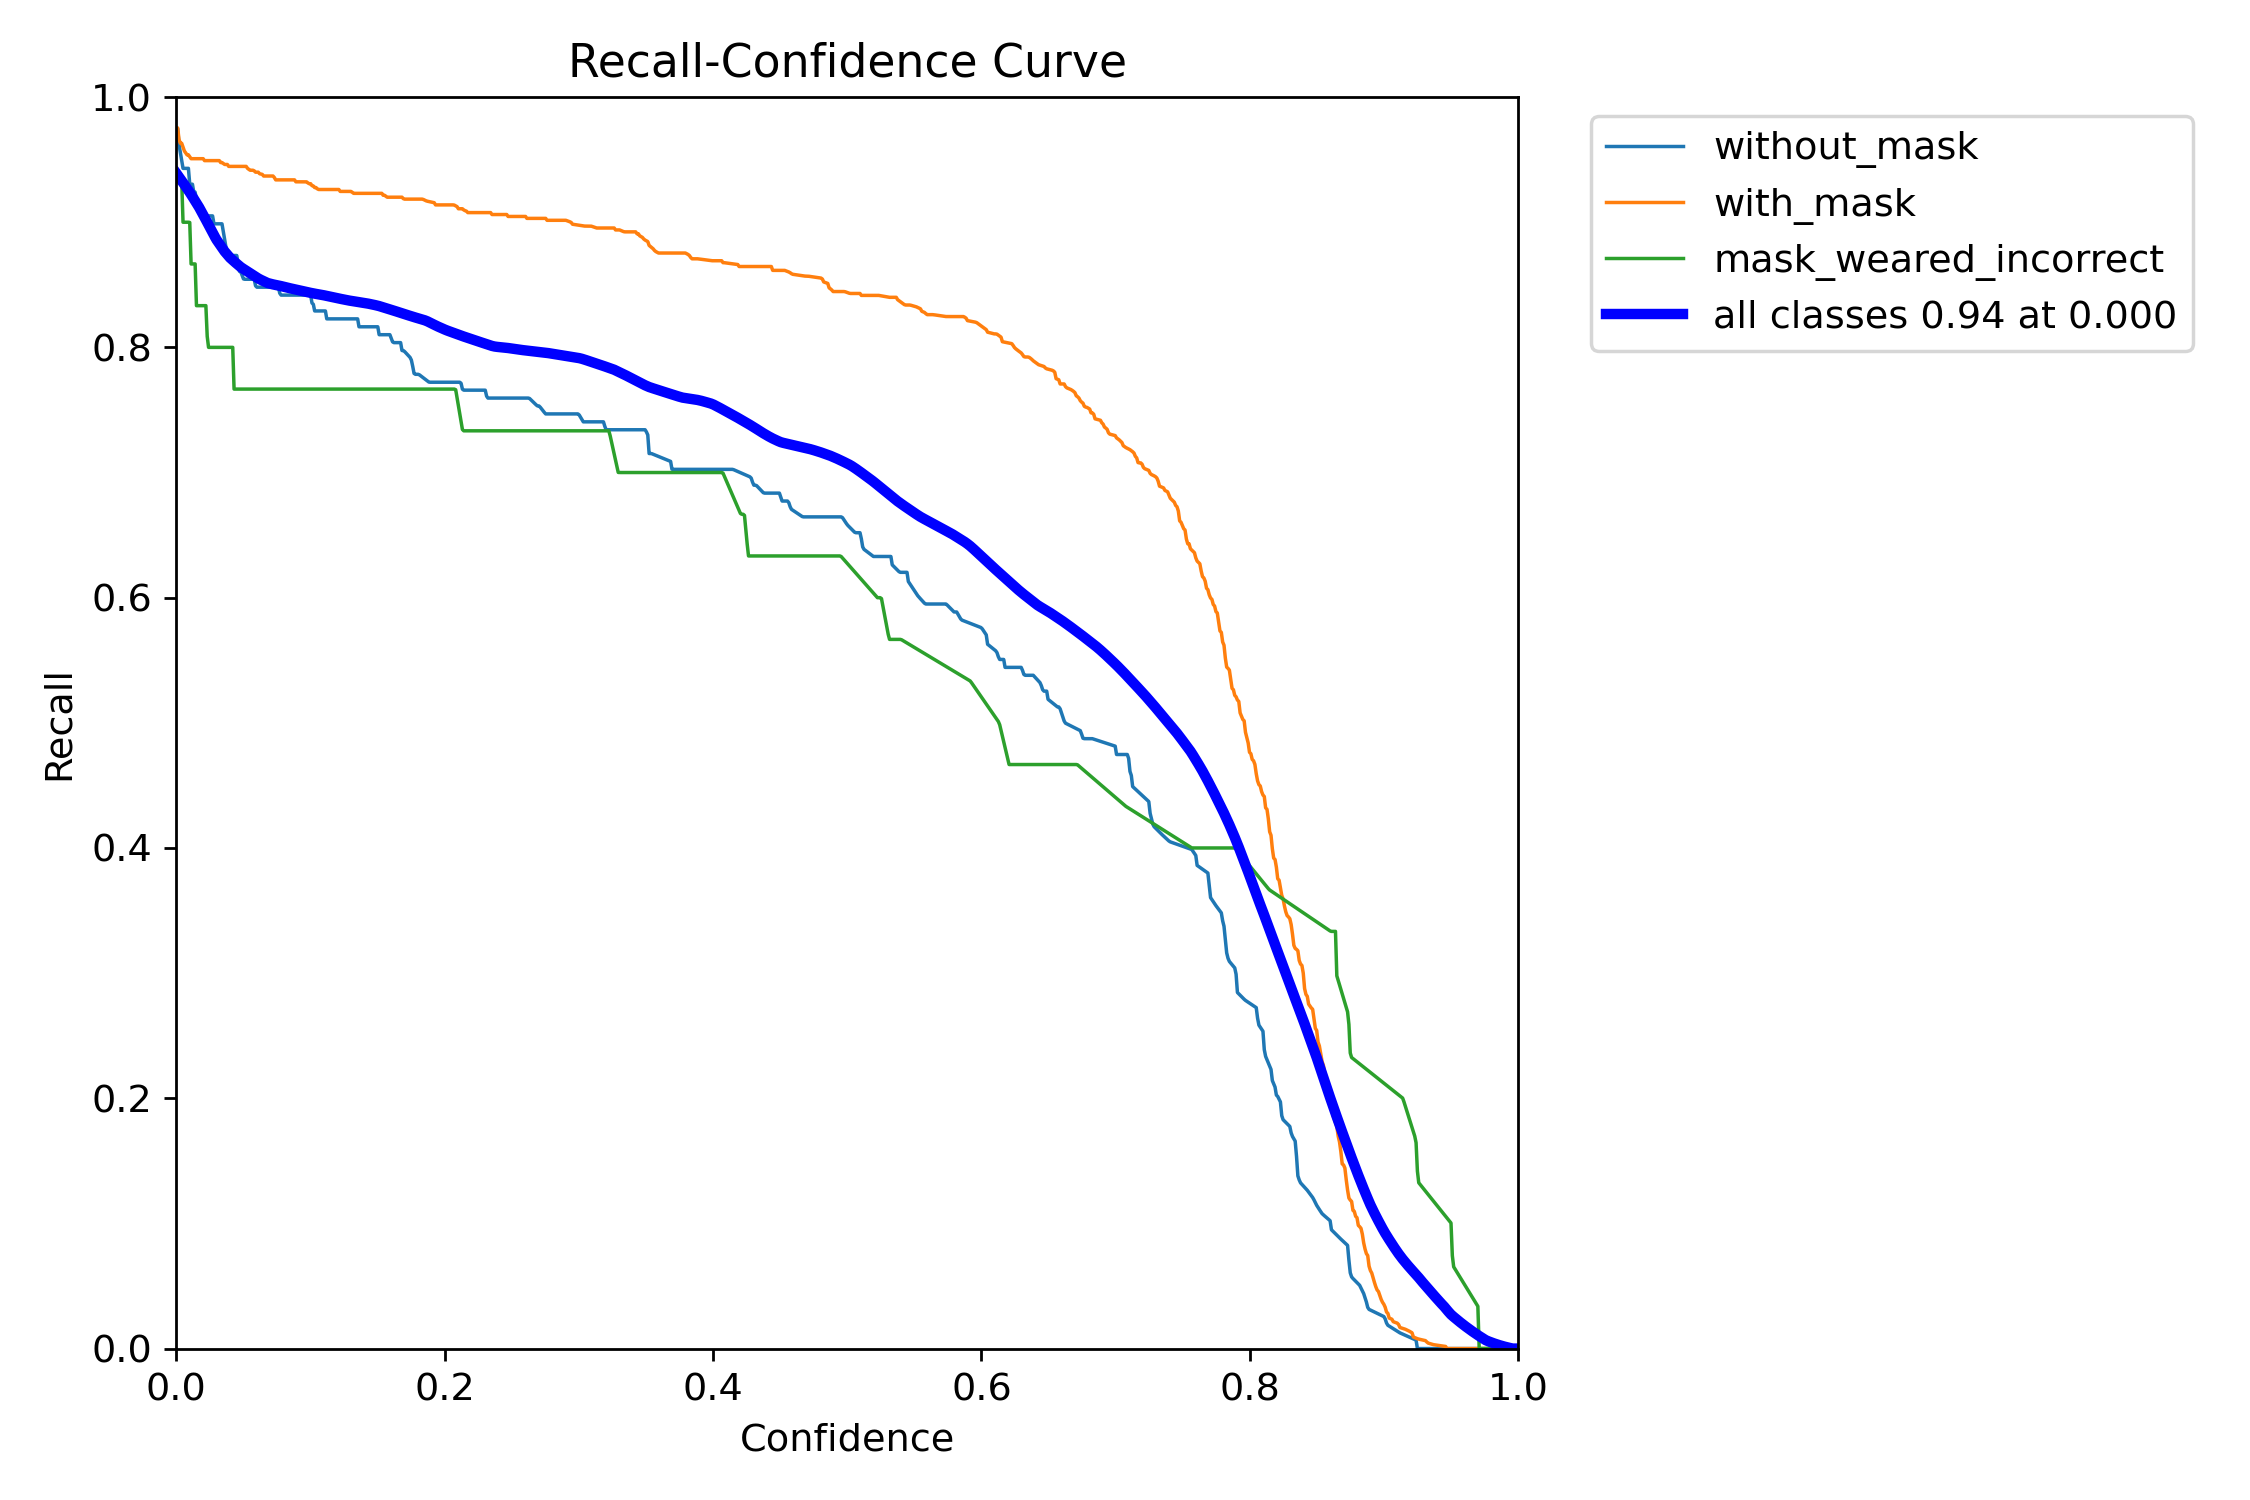

In [31]:
Image(filename=f'{run_path}/R_curve.png', width=600)

#### Results

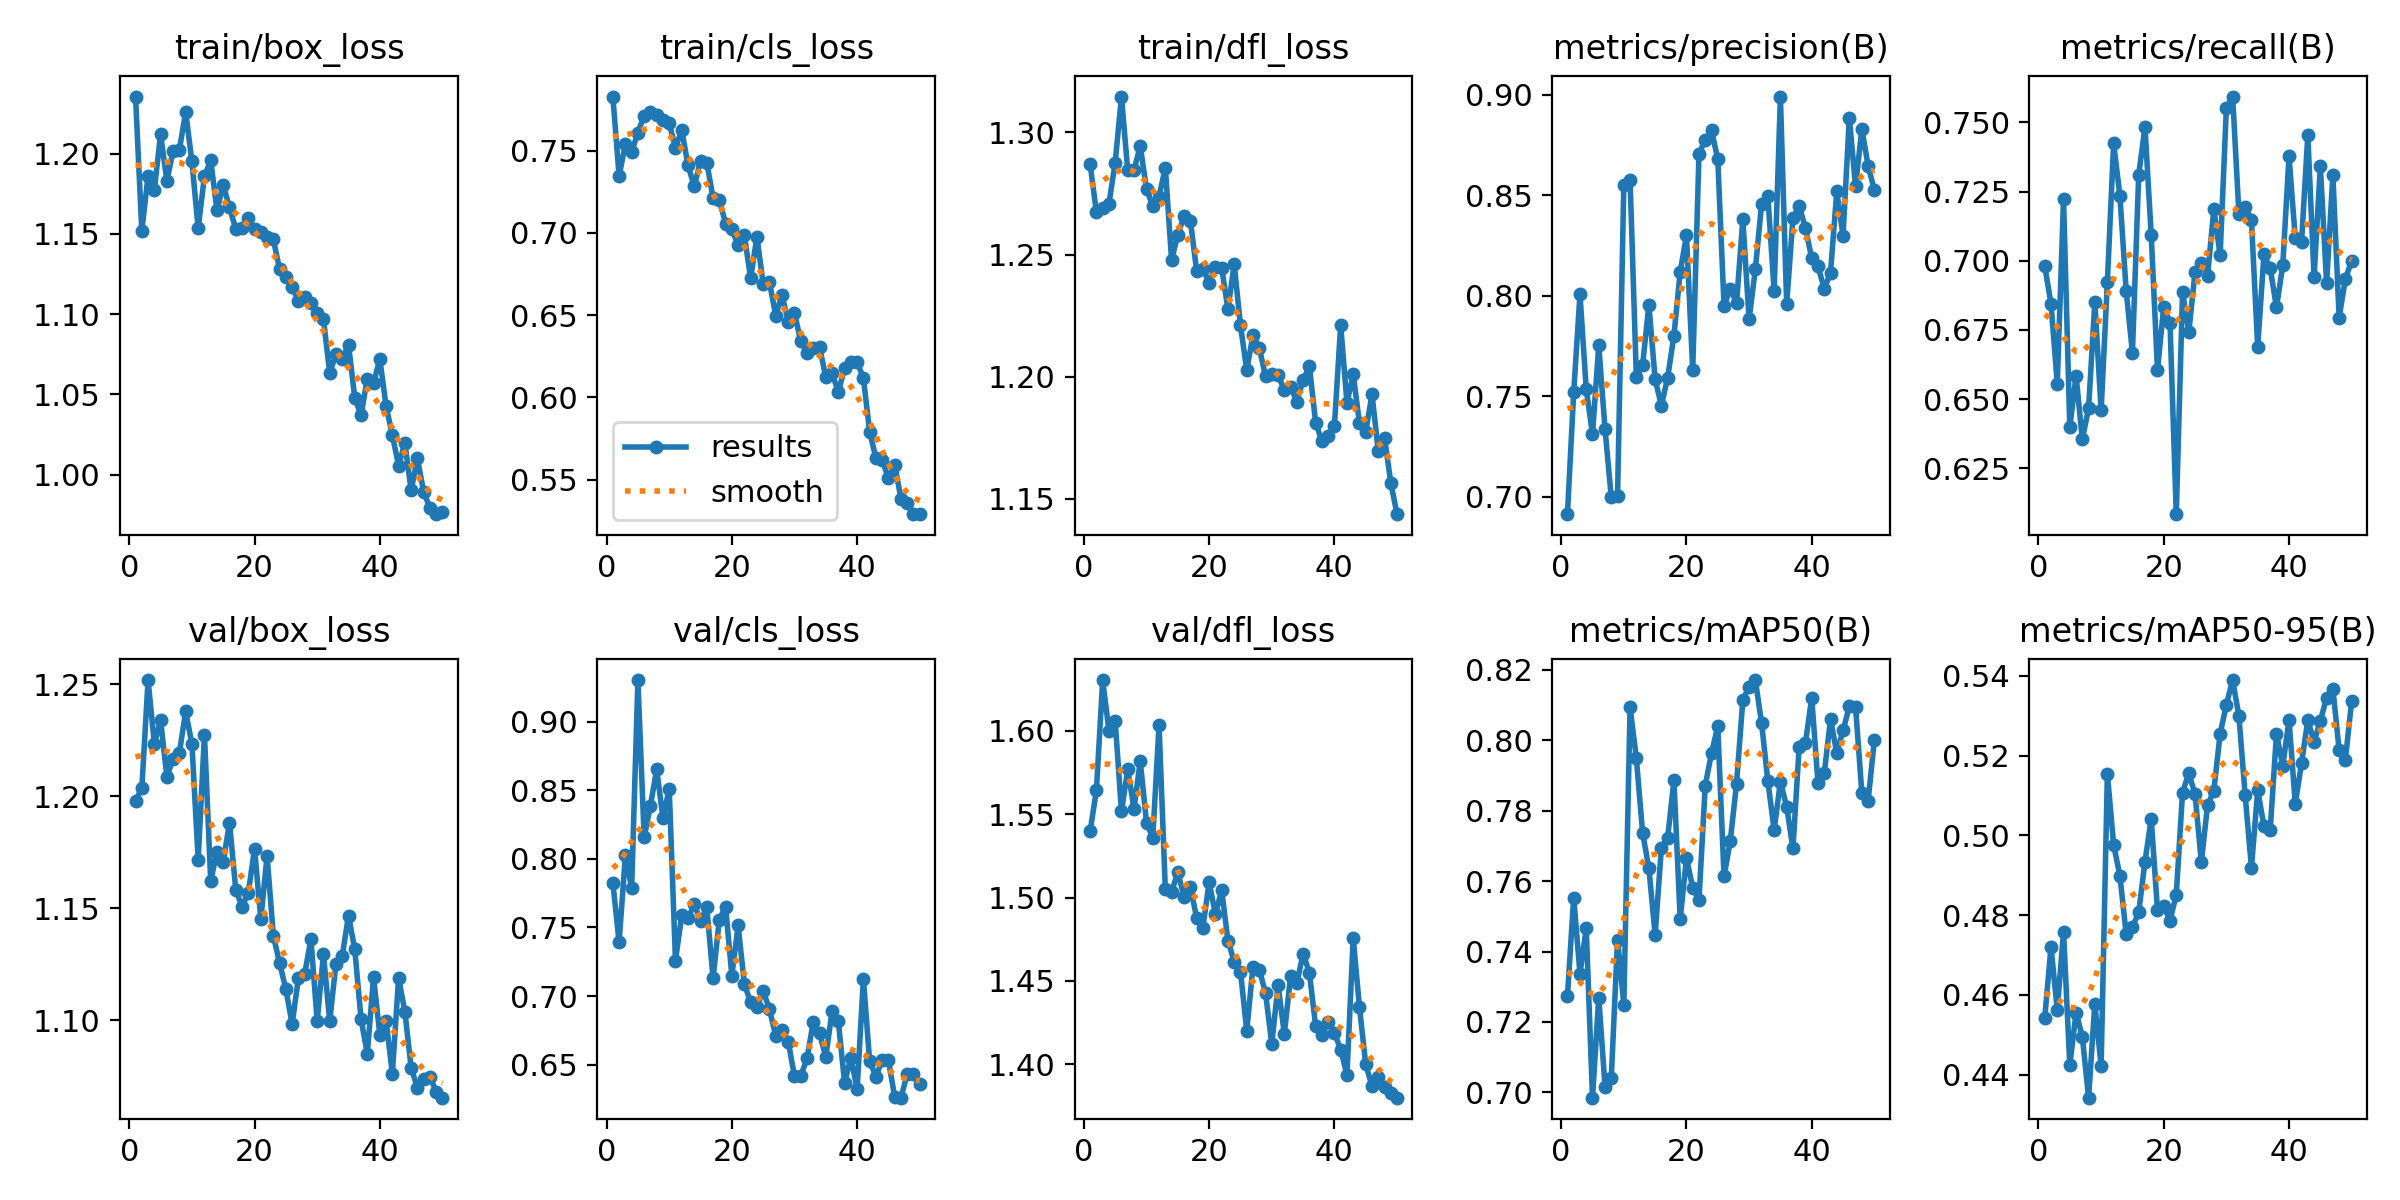

In [32]:
Image(filename=f'{run_path}/results.png', width=600)

#### Prediction Visual Validation

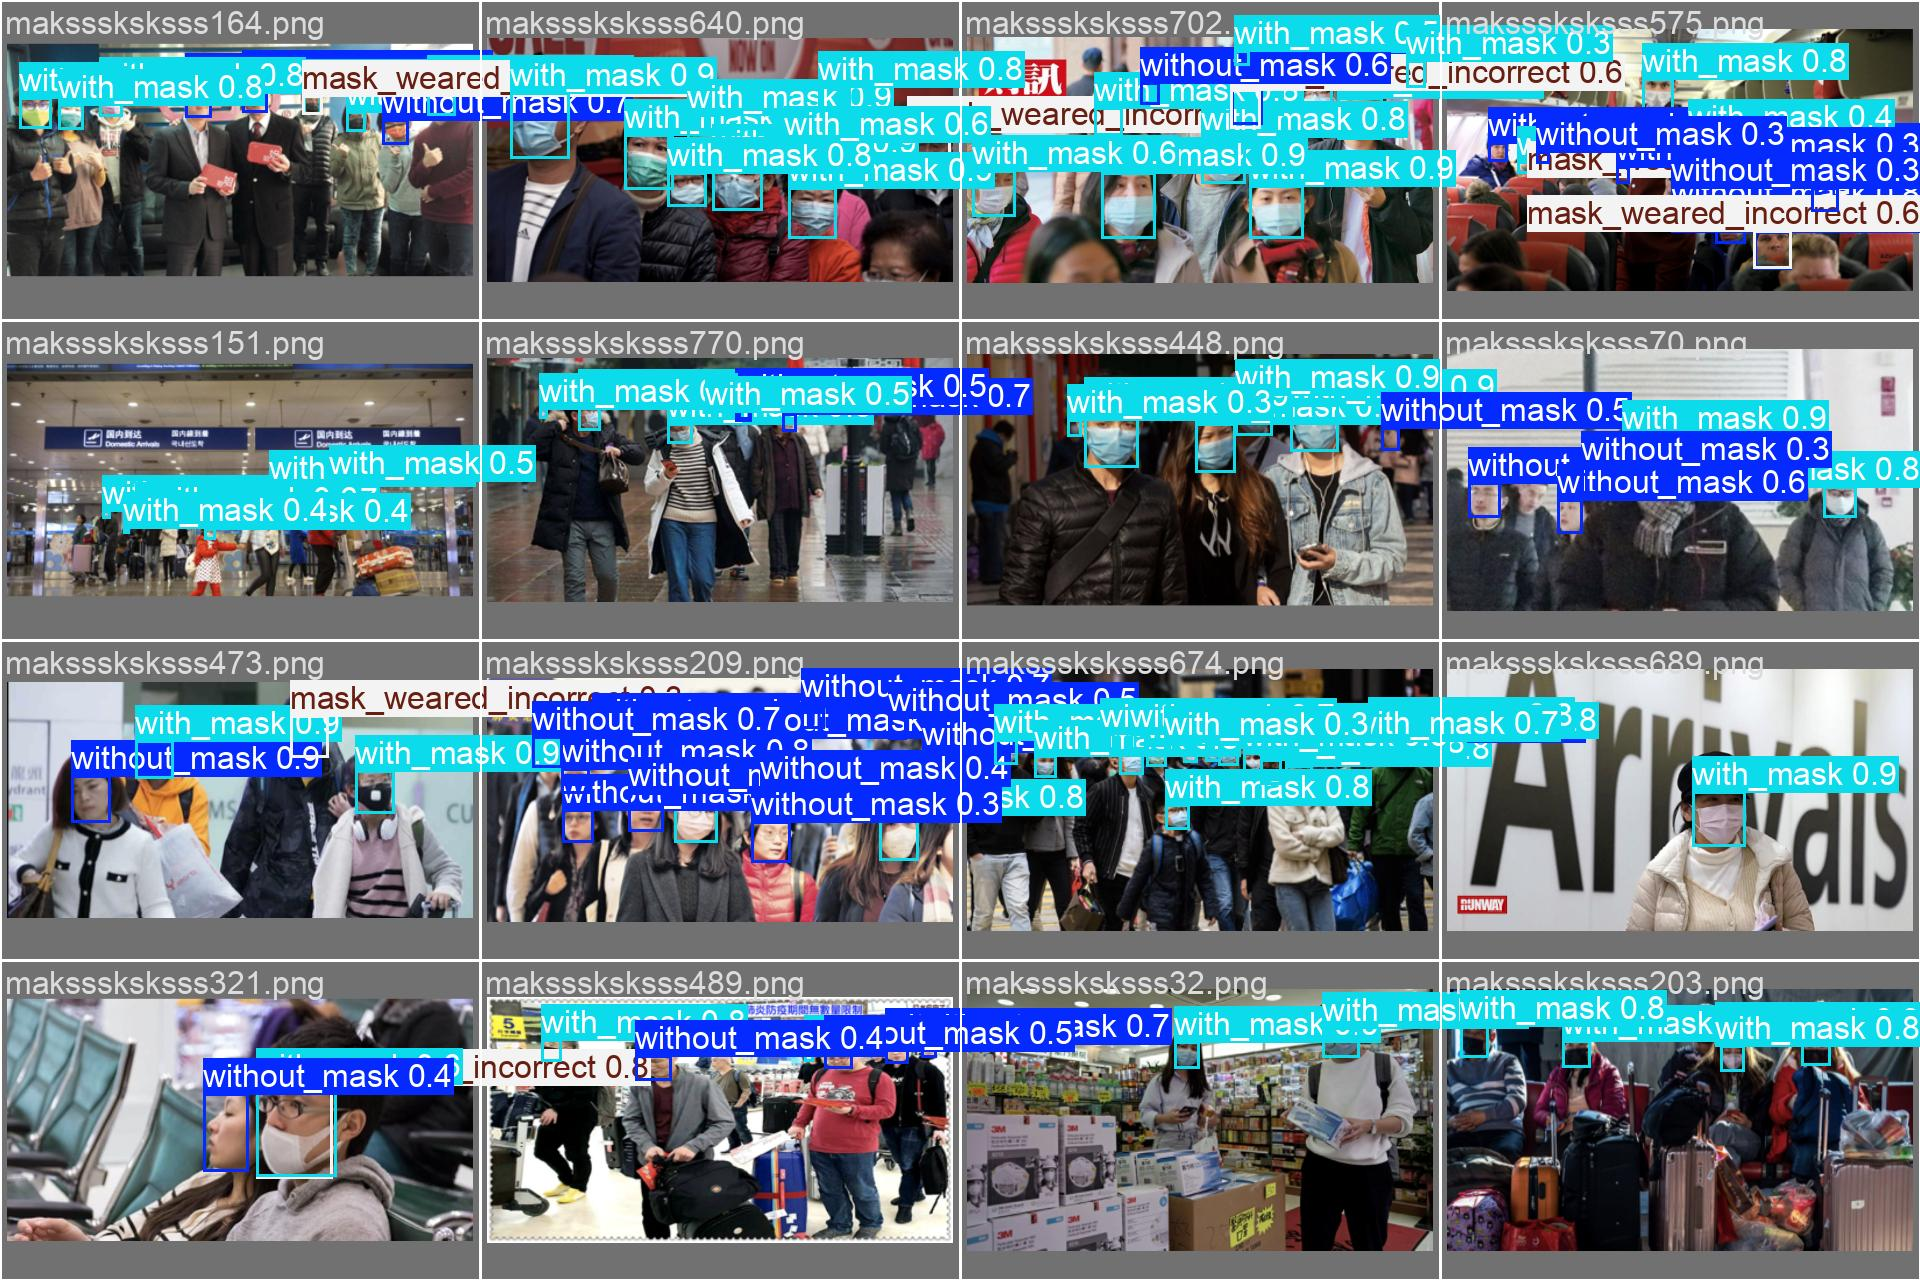

In [33]:
Image(filename=f'{run_path}/val_batch0_pred.jpg', width=600)

#### Data Overview

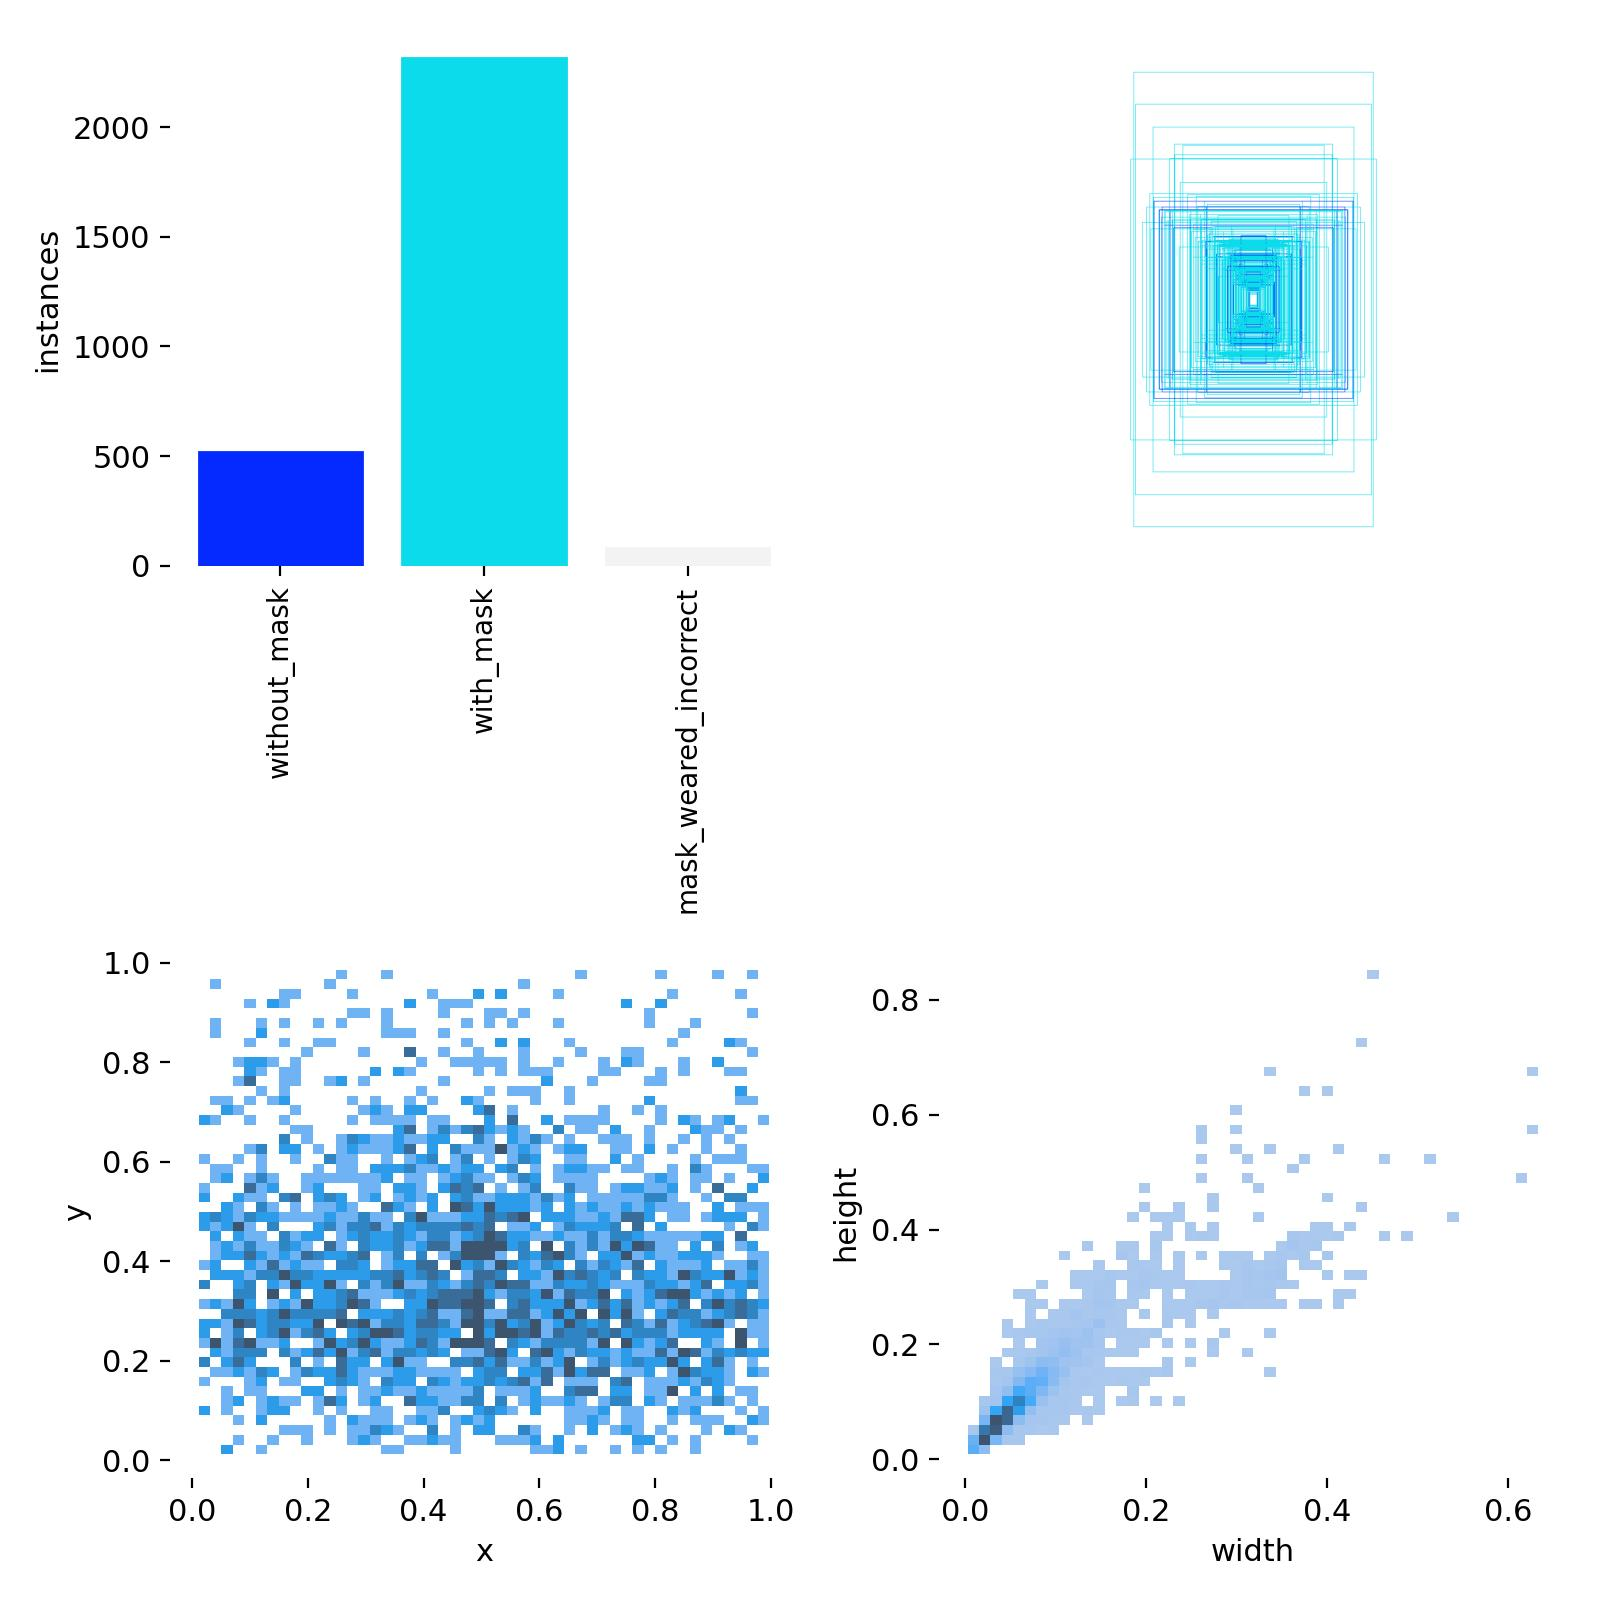

In [34]:
Image(filename=f'{run_path}/labels.jpg', width=600)

## Model (Fine-Tuned) Validation

### Load and Validate Trained model

In [44]:
f'{run_path}/weights/best.pt'

'runs/detect/train_yolo11n_v5/weights/best.pt'

In [45]:
# Load trained YOLO 11
!yolo task=detect mode=val \
      model={run_path}/weights/best.pt \
      data=data_config.yaml \
      project={run_path}

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/drive/MyDrive/projects/Face-Mask-Detection/data/val/labels.cache... 170 images, 0 backgrounds, 0 corrupt: 100% 170/170 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  3.21it/s]
                   all        170        838      0.884      0.718      0.797      0.515
          without_mask         63        158       0.87      0.703      0.772      0.477
             with_mask        157        650      0.951      0.851      0.929      0.638
 mask_weared_incorrect         24         30      0.831        0.6      0.691      0.429
Speed: 0.8ms preprocess, 6.2ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train_yolo11n_v5/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Display Some Samples

In [ ]:
latest_folder = max(glob.glob(os.path.join(run_path, "val")), key=os.path.getmtime)
print(f"Latest folder created: {latest_folder}")
for img in glob.glob(f'{latest_folder}/*.jpg')[0:4]:
  display(Image(filename=img, width=600))
  print("\n")

## Export Model Weights

In [45]:
shutil.copy(os.path.join(run_path, "weights/best.pt"), "../models/yolo11")

'../models/yolo11/best.pt'

## Model (Fine-Tuned) Test

In [19]:
# Load trained YOLO 11
!yolo task=detect mode=predict \
      model={run_path}/weights/best.pt \
      source=test/images \
      data=data_config.yaml \
      project={run_path}

Ultralytics 8.3.37 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss103.png: 480x640 4 with_masks, 68.9ms
image 2/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss120.png: 640x512 1 with_mask, 68.5ms
image 3/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss122.png: 448x640 1 with_mask, 68.6ms
image 4/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss125.png: 640x512 1 without_mask, 1 with_mask, 10.6ms
image 5/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss127.png: 640x448 1 with_mask, 67.3ms
image 6/86 /content/drive/MyDrive/projects/Face-Mask-Detection/data/test/images/maksssksksss138.png: 448x640 3 with_masks, 10.6ms
image 7/86 /content/drive/MyDrive/project

## Export Code Repository to GitHub

In [ ]:
!ls

In [ ]:
# Change directory
os.chdir('/content/drive/MyDrive/projects/Face-Mask-Detection')

In [ ]:
!ls

In [ ]:
# !du -h data/runs | sort -h

In [ ]:
# !git reset --soft HEAD~1

In [ ]:
# Add, commit, and push
!git init
!git status
!git add *
!git commit -m "YOLO 11"
!git pull origin main
!git push origin main
